In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import sem

import math

mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_drug=pd.read_csv(mouse_drug_data_to_load)
clinical_trial=pd.read_csv(clinical_trial_data_to_load)

cancer_drug=pd.merge(mouse_drug, clinical_trial, on="Mouse ID")
cancer_drug.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_and_time=cancer_drug.groupby(["Drug","Timepoint"])
tumor_vol_by_drug_and_time=drug_and_time.mean()
tumor_vol_by_drug_and_time=tumor_vol_by_drug_and_time["Tumor Volume (mm3)"]
tumor_vol_by_drug_and_time.head(10)
# Convert to DataFrame
tumor_vol_by_drug_and_time_df=pd.DataFrame(tumor_vol_by_drug_and_time)
# Preview DataFrame
tumor_vol_by_drug_and_time_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
count =drug_and_time["Tumor Volume (mm3)"].count()
sqrt=[math.sqrt(s) for s in count]
se=drug_and_time["Tumor Volume (mm3)"].std()/sqrt

# Convert to DataFrame
se_df=pd.DataFrame(se)

# Preview DataFrame
se_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [70]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_by_drug_and_time_reorg=tumor_vol_by_drug_and_time_df.unstack(0)


# Preview that Reformatting worked
tumor_vol_by_drug_and_time_reorg.head(10)



Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [5]:
#reorganize the standard error bars
se_reorg=se_df.unstack(0)
se_reorg


Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   
25                  0.881642  0.439356  0.550315  0.755413  0.813706   
30                  0.934460  0.490620  0.631061  0.934121  0.975496   
35                  1.052241  0.692248  0.984155  1.127867  1.013769   
40                  1.223608  0.708505  1.055220  1.158449  1.118567   
45                  1.223977  0.902358  1.144427  1.453186  1.416363   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182  
25         1.034872  0.577401  0.746991  0.741922  0.602513  
30         1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.351726  1.888586  1.226805  1.576556  1.003576

Text(0.5,1,'Tumor Response to Treatment')

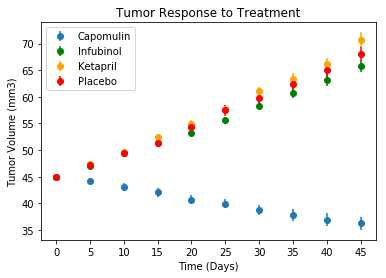

In [6]:
#create the x axis
x=np.arange(0,len(se_reorg),1)

#create plots with error bars
fig, ax = plt.subplots()
ax.errorbar(x, tumor_vol_by_drug_and_time_reorg["Tumor Volume (mm3)"]["Capomulin"],se_reorg["Tumor Volume (mm3)"]["Capomulin"], fmt="o")
ax.errorbar(x, tumor_vol_by_drug_and_time_reorg["Tumor Volume (mm3)"]["Infubinol"],se_reorg["Tumor Volume (mm3)"]["Infubinol"], color="green",fmt="o")
ax.errorbar(x, tumor_vol_by_drug_and_time_reorg["Tumor Volume (mm3)"]["Ketapril"],se_reorg["Tumor Volume (mm3)"]["Ketapril"], color="orange",fmt="o")
ax.errorbar(x, tumor_vol_by_drug_and_time_reorg["Tumor Volume (mm3)"]["Placebo"],se_reorg["Tumor Volume (mm3)"]["Placebo"], color="red",fmt="o")

#generate x axis labels
tick_list=[value for value in x]
labels=["0", "5","10", "15", "20", "25", "30", "35", "40", "45"]
ax.set_xticks(x)
ax.set_xticklabels(labels)

#add legend
ax.legend(loc="upper left")

#add extras
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")




## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_and_time=cancer_drug.groupby(["Drug","Timepoint"])

met_by_drug_and_time=drug_and_time.mean()

met_by_drug_and_time=met_by_drug_and_time["Metastatic Sites"]
met_by_drug_and_time.head(10)

# Convert to DataFrame
met_by_drug_and_time_df=pd.DataFrame(met_by_drug_and_time)

# Preview DataFrame
met_by_drug_and_time_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [13]:

count2 =drug_and_time["Metastatic Sites"].count()
sqrt2=[math.sqrt(s) for s in count]
se2=drug_and_time["Metastatic Sites"].std()/sqrt2

# Convert to DataFrame
se_df2=pd.DataFrame(se2)

# Preview DataFrame
se_df2.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [14]:
# Minor Data Munging to Re-Format the Data Frames
met_by_drug_and_time_reorg=met_by_drug_and_time_df.unstack(0)


# Preview that Reformatting worked
met_by_drug_and_time_reorg.head(5)


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

Text(0.5,1,'Metastatic Spread During Treatment')

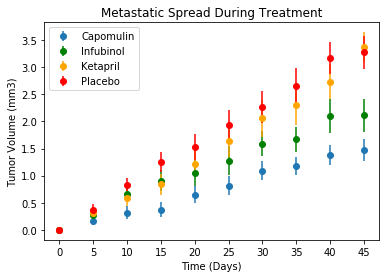

In [16]:
#reorganize the standard error bars
se_reorg2=se_df2.unstack(0)

#create the x axis
x2=np.arange(0,len(se_reorg2),1)

#create plots with error bars
fig2, ax = plt.subplots()
ax.errorbar(x2, met_by_drug_and_time_reorg["Metastatic Sites"]["Capomulin"],se_reorg2["Metastatic Sites"]["Capomulin"], fmt="o")
ax.errorbar(x2, met_by_drug_and_time_reorg["Metastatic Sites"]["Infubinol"],se_reorg2["Metastatic Sites"]["Infubinol"], color="green",fmt="o")
ax.errorbar(x2, met_by_drug_and_time_reorg["Metastatic Sites"]["Ketapril"],se_reorg2["Metastatic Sites"]["Ketapril"], color="orange",fmt="o")
ax.errorbar(x2, met_by_drug_and_time_reorg["Metastatic Sites"]["Placebo"],se_reorg2["Metastatic Sites"]["Placebo"], color="red",fmt="o")

#generate x axis labels
tick_list2=[value for value in x2]
labels2=["0", "5","10", "15", "20", "25", "30", "35", "40", "45"]
ax.set_xticks(x2)
ax.set_xticklabels(labels2)

#add legend
ax.legend(loc="upper left")

#add extras
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Metastatic Spread During Treatment")


## Survival Rates

In [23]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

survivial=pd.DataFrame(drug_and_time["Mouse ID"].count())
survivial.head(5)


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [40]:

# Minor Data Munging to Re-Format the Data Frames
survivial_reorg=survivial.unstack(0)

# Preview that Reformatting worked
survivial_reorg.head(10)


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

([<matplotlib.axis.XTick at 0x1a21405278>,
 <a list of 10 Text xticklabel objects>)

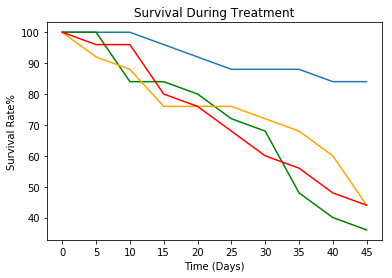

In [41]:
# Generate the Plot (Accounting for percentages)
survival_per=survivial_reorg/25*100

plt.plot(x,survival_per["Mouse ID"]["Capomulin"])
plt.plot(x,survival_per["Mouse ID"]["Infubinol"], color="green")
plt.plot(x,survival_per["Mouse ID"]["Ketapril"], color="orange")
plt.plot(x,survival_per["Mouse ID"]["Placebo"], color="red")


plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate%")
plt.title("Survival During Treatment")
plt.xticks(x,["0","5","10", "15", "20", "25", "30", "35", "40", "45"])

# Show the Figure


## Summary Bar Graph

In [102]:
# Calculate the percent changes for each drug



change=(tumor_vol_by_drug_and_time_reorg-45)/45*100
# Display the data to confirm
change2=change.stack()
change2.drop(change2.index[:90], inplace=True)
change3=change2.unstack()
change3

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
45                -19.475303  42.516492  46.123472  57.028795  53.923347   

                                                               
Drug        Placebo   Propriva Ramicane   Stelasyn  Zoniferol  
Timepoint                                                      
45         51.29796  47.241175 -22.3209  52.085134  46.579751

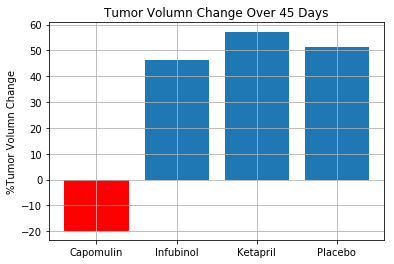

In [137]:
fourdrugs=[-19.47, 46.12, 57.03, 51.30]

labels=["Capomulin","Infubinol","Ketapril","Placebo"]

x_axis=np.arange(len(labels))
barlist=plt.bar(x_axis,fourdrugs, label=fourdrugs)
barlist[0].set_color('r')
plt.xticks(x_axis,labels)


plt.ylabel("%Tumor Volumn Change")
plt.title("Tumor Volumn Change Over 45 Days")
plt.grid()
plt.show()